Importing the necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder



We see that the following dataset is very unbalanced due to very less training examples for fraudulent transactions
For such machine learning problems, the accuracy metric is not a good measure to evaluate our model's performance

In [3]:
train_data = pd.read_csv('D:\VS Code Folders\CODSOFT\Credit Card Fraud Detection\credit card dataset\\fraudTrain.csv')
train_data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [4]:
test_data = pd.read_csv('D:\VS Code Folders\CODSOFT\Credit Card Fraud Detection\credit card dataset\\fraudTest.csv')
test_data['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [5]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

Performing EDA

Visualizing the relation between categories and fraudulent transactions

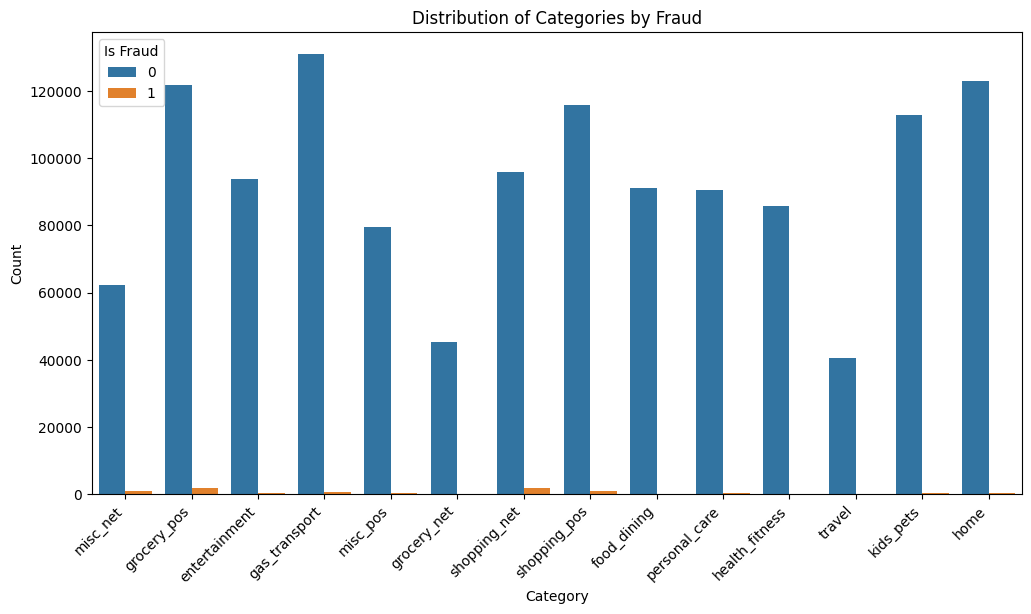

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=train_data)
plt.title('Distribution of Categories by Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

In [7]:
train_data['city'].value_counts()

city
Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce             7
Chattanooga       7
Name: count, Length: 894, dtype: int64

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

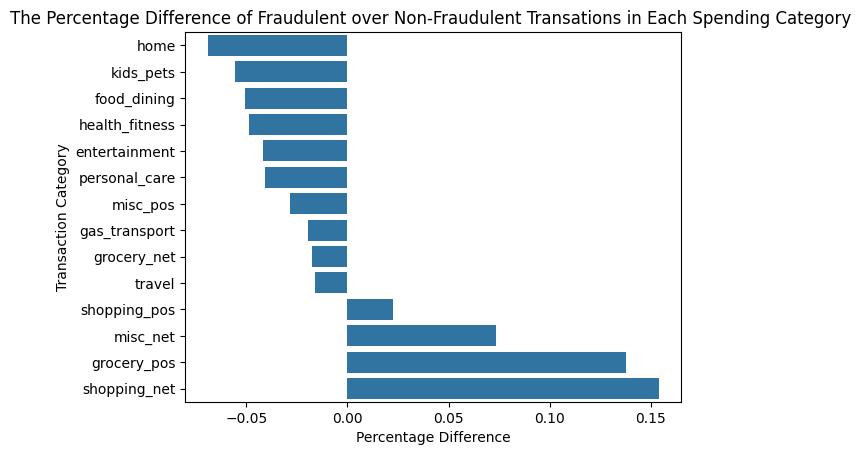

In [8]:
a=train_data[train_data['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=train_data[train_data['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=True))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

Visualizing the trend of fraudulent transactions that happen in 24 hours in a day, trying to note if any relationship exists

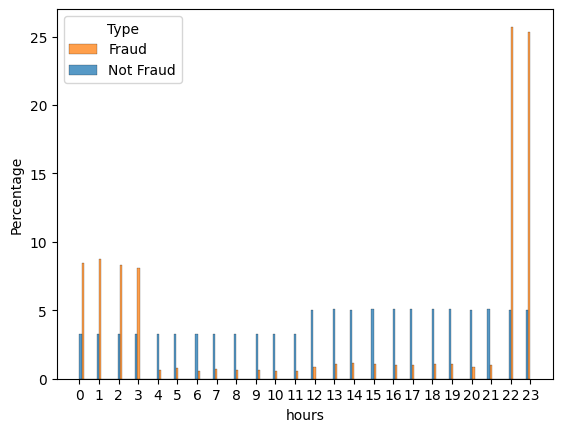

In [9]:
import datetime as dt
train_data['trans_date_trans_time']
train_data['hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
train_data['hour']
ax = sns.histplot(x = 'hour', data=train_data, hue = 'is_fraud', common_norm = False, stat = 'percent', multiple = 'dodge')
ax.set_xlabel('hours')
ax.set_ylabel('Percentage')
plt.xticks(np.arange(0, 24, 1))
plt.legend(title = 'Type', labels = ['Fraud', 'Not Fraud'])
plt.show()

Visualizing the Fraud transactions and their relation with the days of a week

C:\Users\HP\AppData\Local\Temp\ipykernel_25496\2234799818.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


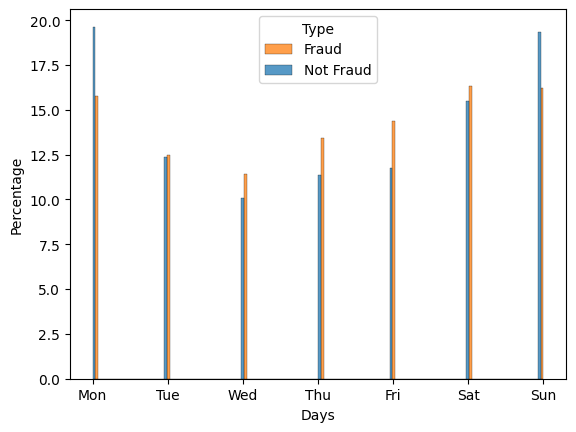

In [10]:
import datetime as dt
train_data['trans_date_trans_time']
train_data['day'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.dayofweek
ax = sns.histplot(x = 'day', data=train_data, hue = 'is_fraud', common_norm = False, stat = 'percent', multiple = 'dodge')
ax.set_xlabel('Days')
ax.set_ylabel('Percentage')
ax.set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.xticks(np.arange(0,7,1))
plt.legend(title = 'Type', labels = ['Fraud', 'Not Fraud'])
plt.show()

Visualizing the relation between the fraud transactions and months of an year

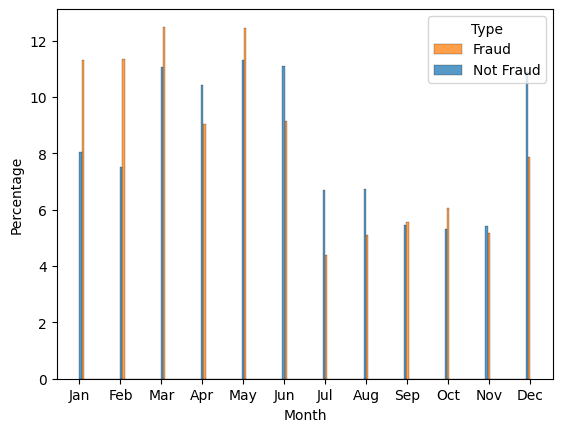

In [11]:
train_data['month']=pd.to_datetime(train_data['trans_date_trans_time']).dt.month
ax=sns.histplot(data=train_data, x="month", hue="is_fraud", common_norm=False, stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Comparing the fraudelent transactions in states

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each State')

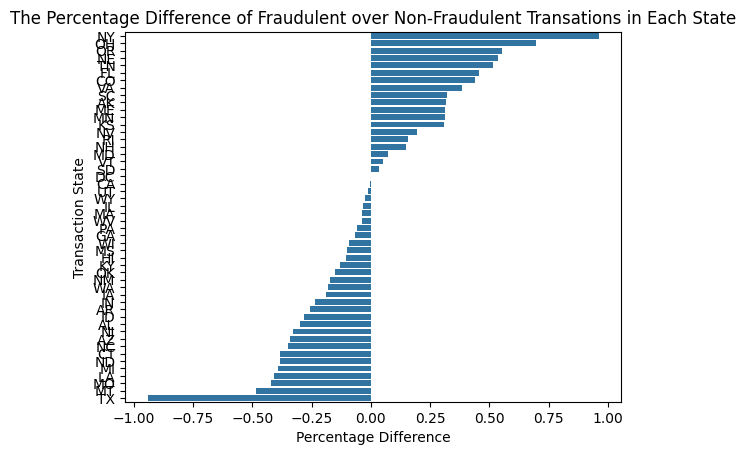

In [12]:
a = train_data['state'][train_data.is_fraud == 0].value_counts(normalize= True).to_frame().reset_index()
a.columns = ['state', 'not a fraud %']

b = train_data['state'][train_data.is_fraud == 1].value_counts(normalize= True).to_frame().reset_index()
b.columns = ['state', 'fraud %']

ab = a.merge(b, on = 'state')
ab['diff'] = ab['fraud %'] - ab['not a fraud %']
ab['diff']=ab['diff']*100
ax = sns.barplot(x = 'diff', y = 'state', data = ab.sort_values('diff', ascending= False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction State')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each State')


Visualizing the trend in Age and Fraudulent Transactions

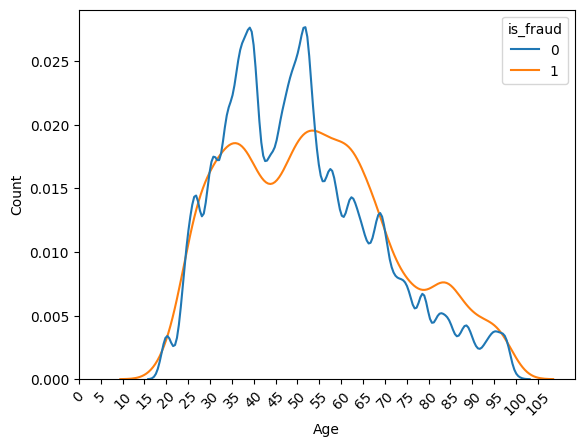

In [13]:
train_data['age'] = dt.date.today().year - pd.to_datetime(train_data['dob']).dt.year
sns.kdeplot(x = 'age', data = train_data, hue = 'is_fraud', common_norm=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(np.arange(0, 110, 5), rotation = 45)
plt.show()

The values of the city, jobs and the streets were too many, so we are not going to use these parameters while training our model
Similarly, the dob and the transaction times and dates have been entered in a separate column using the to_datetime function of the pandas. These additional parameters shall be useful to train our model and hopefully get better results.

Pre-processing

In [14]:
train=train_data[['category','amt','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud', 'job']]

# Assuming train is your DataFrame
label_columns = ['category', 'job']

# Apply LabelEncoder to columns with ordinal categories
label_encoder = LabelEncoder()
train[label_columns] = train[label_columns].apply(label_encoder.fit_transform)
train.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_25496\3258985216.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[label_columns] = train[label_columns].apply(label_encoder.fit_transform)


,category,amt,lat,long,city_pop,merch_lat,merch_long,age,hour,day,month,is_fraud,job
0,8,4.97,36.0788,-81.1781,3495,36.011293,-82.048315,36,0,1,1,0,370
1,4,107.23,48.8878,-118.2105,149,49.159047,-118.186462,46,0,1,1,0,428
2,0,220.11,42.1808,-112.2620,4154,43.150704,-112.154481,62,0,1,1,0,307
3,2,45.00,46.2306,-112.1138,1939,47.034331,-112.561071,57,0,1,1,0,328
4,9,41.96,38.4207,-79.4629,99,38.674999,-78.632459,38,0,1,1,0,116


Using SMOTE to make the dataset balanced for better results..!!
Dividing the given train set into train and validation sets for analyzing the performance

In [15]:
X = train.drop("is_fraud", axis=1)
y = train["is_fraud"]
method= SMOTE()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
X_train, y_train = method.fit_resample(X_train, y_train)

In [16]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1804902, 12), (1804902,), (389003, 12), (389003,))

In [17]:
y_val.value_counts()

is_fraud
0    386718
1      2285
Name: count, dtype: int64

In fraud detection, the primary goal is to identify as many fraudulent transactions as possible. Missing a fraudulent transaction (false negative) can have significant consequences, both in terms of financial losses and potential harm to the affected individuals or organizations.
Recall is especially relevant in this context because it measures the ability of the model to capture all the actual positive instances (fraudulent transactions). A higher recall means the model is better at identifying most of the fraudulent transactions. So, our primary goal should be to increase the score of recall..!!
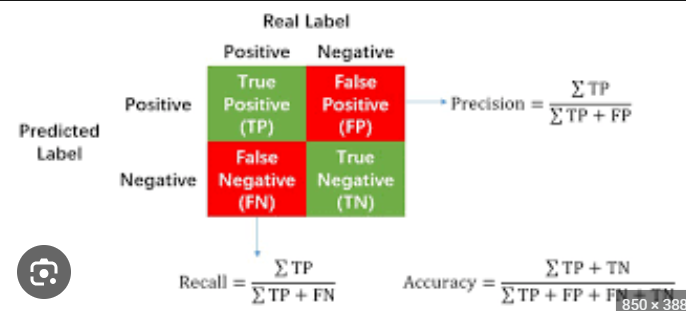

Models Training

Logistic Regression Model

In [18]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [19]:
log_reg_y_pred = lg.predict(X_val)

In [20]:
print("Classification Report Logistic Regression: \n", classification_report(y_val, log_reg_y_pred, target_names = ['Not Fraud', 'Fraud']))

Classification Report Logistic Regression: 
               precision    recall  f1-score   support

   Not Fraud       1.00      0.95      0.97    386718
       Fraud       0.08      0.77      0.15      2285

    accuracy                           0.95    389003
   macro avg       0.54      0.86      0.56    389003
weighted avg       0.99      0.95      0.97    389003



Linear SVC

In [21]:
from sklearn.svm import LinearSVC
esvc = LinearSVC(class_weight='balanced')
esvc.fit(X_train, y_train)
esvc_y_pred = esvc.predict(X_val)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [22]:
print("Classification Report Linear SVC Model: \n", classification_report(y_val, esvc_y_pred, target_names = ['Not Fraud', 'Fraud']))

Classification Report Linear SVC Model: 
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    386718
       Fraud       0.36      0.29      0.32      2285

    accuracy                           0.99    389003
   macro avg       0.68      0.64      0.66    389003
weighted avg       0.99      0.99      0.99    389003



In [23]:
from sklearn.linear_model import Ridge 
scores = [] 
for alpha in [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]: 
    ridge = Ridge(alpha=alpha) 
    ridge.fit(X_train, y_train) 
    y_pred = ridge.predict(X_val) 
    scores.append(ridge.score(X_val, y_val)) 
scores

[-19.46117398344277,
 -19.461173971520214,
 -19.46117385229464,
 -19.46117266004081,
 -19.461160737691003,
 -19.461041532936562]

Random Forest Classifier Model

In [24]:
Rfs = RandomForestClassifier(random_state=5)
Rfs.fit(X_train,y_train)
predicted=Rfs.predict(X_val)
print('Classification report Random Forest Classifier:\n', classification_report(y_val, predicted, target_names = ['Not Fraud', 'Fraud']))

Classification report Random Forest Classifier:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    386718
       Fraud       0.66      0.84      0.74      2285

    accuracy                           1.00    389003
   macro avg       0.83      0.92      0.87    389003
weighted avg       1.00      1.00      1.00    389003



Training using a Neural Network simple Model

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
neural_network = Sequential()
neural_network.add(InputLayer((X_train.shape[1],)))
neural_network.add(Dense(2, activation = 'relu'))
neural_network.add(BatchNormalization())
# neural_network.add(Dropout(0.2))
neural_network.add(Dense(1, activation = 'sigmoid'))
checkpoint = ModelCheckpoint('neural_network', save_best_only = True)
neural_network.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
my_callbacks  = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=0,
                              mode='auto')]

In [27]:
neural_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 26        
                                                                 
 batch_normalization (Batch  (None, 2)                 8         
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 4 (16.00 Byte)
_________________________________________________________________


In [28]:
neural_network.fit(X_train, y_train, validation_data = (X_val, y_val), callbacks = [checkpoint, my_callbacks], epochs = 5)

Epoch 1/5
56404/56404 [==============================] - ETA: 0s - loss: 0.4270 - accuracy: 0.8371INFO:tensorflow:Assets written to: neural_network\assets


INFO:tensorflow:Assets written to: neural_network\assets


56404/56404 [==============================] - 162s 3ms/step - loss: 0.4270 - accuracy: 0.8371 - val_loss: 0.3605 - val_accuracy: 0.9595
Epoch 2/5
56404/56404 [==============================] - 151s 3ms/step - loss: 0.4130 - accuracy: 0.8465 - val_loss: 0.3753 - val_accuracy: 0.9457


In [29]:
def neural_network_predictions(model, X):
    return (model.predict(X).flatten() > 0.5).astype(int)

In [30]:
print('Classification report Neural Network:\n', classification_report(y_val, neural_network_predictions(neural_network, X_val), target_names = ['Not Fraud', 'Fraud']))

12157/12157 [==============================] - 20s 2ms/step
Classification report Neural Network:
               precision    recall  f1-score   support

   Not Fraud       1.00      0.95      0.97    386718
       Fraud       0.08      0.76      0.14      2285

    accuracy                           0.95    389003
   macro avg       0.54      0.86      0.56    389003
weighted avg       0.99      0.95      0.97    389003



Decision Tree Classifier

In [31]:
DTC = DecisionTreeClassifier(random_state=3)
DTC.fit(X_train, y_train)
DTC_pred = DTC.predict(X_val)

In [32]:
print('Classification report Decision Tree Classifier:\n', classification_report(y_val, DTC_pred, target_names = ['Not Fraud', 'Fraud']))

Classification report Decision Tree Classifier:
               precision    recall  f1-score   support

   Not Fraud       1.00      0.99      0.99    386718
       Fraud       0.32      0.83      0.46      2285

    accuracy                           0.99    389003
   macro avg       0.66      0.91      0.73    389003
weighted avg       1.00      0.99      0.99    389003



Now Preparing the Test Data

In [33]:
test_data['age'] = dt.date.today().year - pd.to_datetime(test_data['dob']).dt.year
test_data['day'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.dayofweek
test_data['hour'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.hour
test_data['month'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.month


In [34]:
test=test_data[['category','amt','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud', 'job']]

# Assuming test is your DataFrame
label_columns = ['category', 'job']

# Apply LabelEncoder to columns with ordinal categories
label_encoder = LabelEncoder()
test[label_columns] = test[label_columns].apply(label_encoder.fit_transform)
test.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_25496\865922443.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[label_columns] = test[label_columns].apply(label_encoder.fit_transform)


,category,amt,lat,long,city_pop,merch_lat,merch_long,age,hour,day,month,is_fraud,job
0,10,2.86,33.9659,-80.9355,333497,33.986391,-81.200714,56,12,6,6,0,275
1,10,29.84,40.3207,-110.4360,302,39.450498,-109.960431,34,12,6,6,0,392
2,5,41.28,40.6729,-73.5365,34496,40.495810,-74.196111,54,12,6,6,0,259
3,9,60.05,28.5697,-80.8191,54767,28.812398,-80.883061,37,12,6,6,0,407
4,13,3.19,44.2529,-85.0170,1126,44.959148,-85.884734,69,12,6,6,0,196


In [35]:
X_test = test.drop("is_fraud", axis=1)
y_test = test["is_fraud"]

In [36]:
y_test.value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [37]:
X_test.shape, y_test.shape

((555719, 12), (555719,))

In [38]:
DTC_test_pred = DTC.predict(X_test)
print('Classification report Decision Tree Classifier Test Results:\n', classification_report(y_test, DTC_test_pred, target_names = ['Not Fraud', 'Fraud']))

Classification report Decision Tree Classifier Test Results:
               precision    recall  f1-score   support

   Not Fraud       1.00      0.99      0.99    553574
       Fraud       0.17      0.77      0.28      2145

    accuracy                           0.98    555719
   macro avg       0.58      0.88      0.63    555719
weighted avg       1.00      0.98      0.99    555719



In [39]:
rfs_test_pred=Rfs.predict(X_test)
print('Classification report Random Forest Classifier Test Results:\n', classification_report(y_test, rfs_test_pred, target_names = ['Not Fraud', 'Fraud']))

Classification report Random Forest Classifier Test Results:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    553574
       Fraud       0.60      0.74      0.67      2145

    accuracy                           1.00    555719
   macro avg       0.80      0.87      0.83    555719
weighted avg       1.00      1.00      1.00    555719



In [40]:
print('Classification report Neural Network Test Results:\n', classification_report(y_test, neural_network_predictions(neural_network, X_test), target_names = ['Not Fraud', 'Fraud']))

17367/17367 [==============================] - 28s 2ms/step
Classification report Neural Network Test Results:
               precision    recall  f1-score   support

   Not Fraud       1.00      0.95      0.97    553574
       Fraud       0.05      0.74      0.10      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.84      0.54    555719
weighted avg       1.00      0.95      0.97    555719



In [44]:
log_reg_pred=lg.predict(X_test)
print('Classification report Logistic Regression Test Results:\n', classification_report(y_test, log_reg_pred, target_names = ['Not Fraud', 'Fraud']))

Classification report Logistic Regression Test Results:
               precision    recall  f1-score   support

   Not Fraud       1.00      0.95      0.97    553574
       Fraud       0.05      0.75      0.10      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.85      0.54    555719
weighted avg       1.00      0.95      0.97    555719



In [43]:
svc_test_pred=esvc.predict(X_test)
print('Classification report SVC Test Results:\n', classification_report(y_test, svc_test_pred, target_names = ['Not Fraud', 'Fraud']))

Classification report SVC Test Results:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    553574
       Fraud       0.28      0.24      0.26      2145

    accuracy                           0.99    555719
   macro avg       0.64      0.62      0.63    555719
weighted avg       0.99      0.99      0.99    555719



Random Forest Classifier seems the best classifier for this dataset as the recall is almost better than every other classifier and the f1-score and the precision are also better than the other classifiers.